# Задание 1: Фильтр Блума

In [1]:
%reset -f

In [2]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt

from get_hashes_module import get_hashes

In [3]:
class BloomFilter:
    def __init__(self, size, hash_count):
        self.size = size  # Размер битового массива
        self.hash_count = hash_count  # Количество хеш-функций
        self.bit_array = [0] * size  # Битовый массив, начальный вид - все биты равны 0
        self.element_count = 0

    def add(self, item):
        hashes = get_hashes(item, self.size, self.hash_count,)
        for hash in hashes:
            self.bit_array[int(hash,2)] = 1  # Устанавливаем соответствующие биты в 1
        self.element_count += 1

    def check(self, item):
        hashes = get_hashes(item, self.size, self.hash_count)
        for hash in hashes:
            if self.bit_array[int(hash,2)] == 0:
                return False  # Если хотя бы один бит не установлен, элемент точно отсутствует
        return True  # Если все биты установлены, элемент, возможно, присутствует
    
    def union(self, other_filter):
        if self.size != other_filter.size or self.hash_count != other_filter.hash_count:
            raise ValueError("Фильтры должны иметь одинаковые размеры и количество хеш-функций.")

        # Создаем новый фильтр
        result_filter = BloomFilter(self.size, self.hash_count)
        result_filter.bit_array = [a | b for a, b in zip(self.bit_array, other_filter.bit_array)]
        result_filter.element_count = self.element_count + other_filter.element_count
        return result_filter

    def intersection(self, other_filter):
        if self.size != other_filter.size or self.hash_count != other_filter.hash_count:
            raise ValueError("Фильтры должны иметь одинаковые размеры и количество хеш-функций.")
        
        # Создаем новый фильтр
        result_filter = BloomFilter(self.size, self.hash_count)
        result_filter.bit_array = [a & b for a, b in zip(self.bit_array, other_filter.bit_array)]
        result_filter.element_count = min(self.element_count, other_filter.element_count)
        return result_filter
    
    def false_positive_probability(self):
        if self.size == 0 or self.element_count == 0:
            return 0
        
        # Формула для вероятности ложноположительных срабатываний
        m = self.size  # Размер битового массива
        n = self.element_count  # Количество добавленных элементов
        k = self.hash_count  # Количество хеш-функций
        
        argexp = -(k * n) / m
        probability = (1 - math.exp(argexp)) ** k
        return probability

In [4]:
bloom_filter = BloomFilter(size=70, hash_count=3)

# Добавляем несколько элементов
elements_to_add = ["apple", "banana", "cherry"]
for element in elements_to_add:
    bloom_filter.add(element)

# Проверяем элементы
test_elements = ["apple", "banana", "cherry", "grape", 'orange']
for element in test_elements:
    result = bloom_filter.check(element)
    print(f"Элемент '{element}' {'находится в множестве (вероятно)' if result else 'не находится в множестве'}")

Элемент 'apple' находится в множестве (вероятно)
Элемент 'banana' находится в множестве (вероятно)
Элемент 'cherry' находится в множестве (вероятно)
Элемент 'grape' не находится в множестве
Элемент 'orange' не находится в множестве


In [5]:
fp_prob = bloom_filter.false_positive_probability()
print(f"Вероятность ложноположительного срабатывания: {fp_prob * 100:.2f}%")

Вероятность ложноположительного срабатывания: 0.18%


In [6]:
bloom_filter2 = BloomFilter(size=70, hash_count=3)
test_elements2 = {'apple',"strawberry", "blueberry"}
for element in test_elements2:
    bloom_filter2.add(element)

bloom_filter_union = bloom_filter2.union(bloom_filter)
print('Объединение')
for element in test_elements | test_elements2:
    result = bloom_filter_union.check(element)
    print(f"Элемент '{element}' {'находится в множестве (вероятно)' if result else 'не находится в множестве'}")

print('\nПересечение')
bloom_filter_intersection = bloom_filter.intersection(bloom_filter2)

for element in test_elements | test_elements2:
    result = bloom_filter_intersection.check(element)
    print(f"Элемент '{element}' {'находится в множестве (вероятно)' if result else 'не находится в множестве'}")

Объединение


TypeError: unsupported operand type(s) for |: 'list' and 'set'

Таблица зависимости P от m при фиксированном k:
             k=1       k=2       k=3       k=4       k=5       k=6       k=7
m=100   0.632121  0.747645  0.857952  0.928726  0.966761  0.985219  0.993634
m=200   0.393469  0.399576  0.468862  0.558973  0.651647  0.736081  0.806833
m=500   0.181269  0.108689  0.091849  0.091954  0.100925  0.116450  0.137782
m=1000  0.095163  0.032859  0.017411  0.011813  0.009431  0.008436  0.008194
m=2000  0.048771  0.009056  0.002703  0.001080  0.000530  0.000303  0.000196


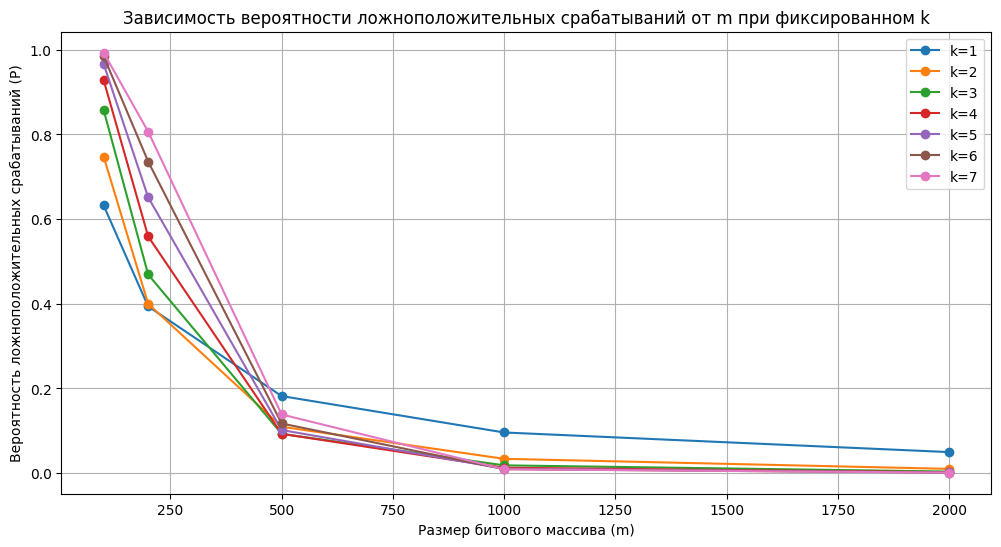


Таблица зависимости P от k при фиксированном m:
        m=100     m=200     m=500    m=1000    m=2000
k=1  0.632121  0.393469  0.181269  0.095163  0.048771
k=2  0.747645  0.399576  0.108689  0.032859  0.009056
k=3  0.857952  0.468862  0.091849  0.017411  0.002703
k=4  0.928726  0.558973  0.091954  0.011813  0.001080
k=5  0.966761  0.651647  0.100925  0.009431  0.000530
k=6  0.985219  0.736081  0.116450  0.008436  0.000303
k=7  0.993634  0.806833  0.137782  0.008194  0.000196


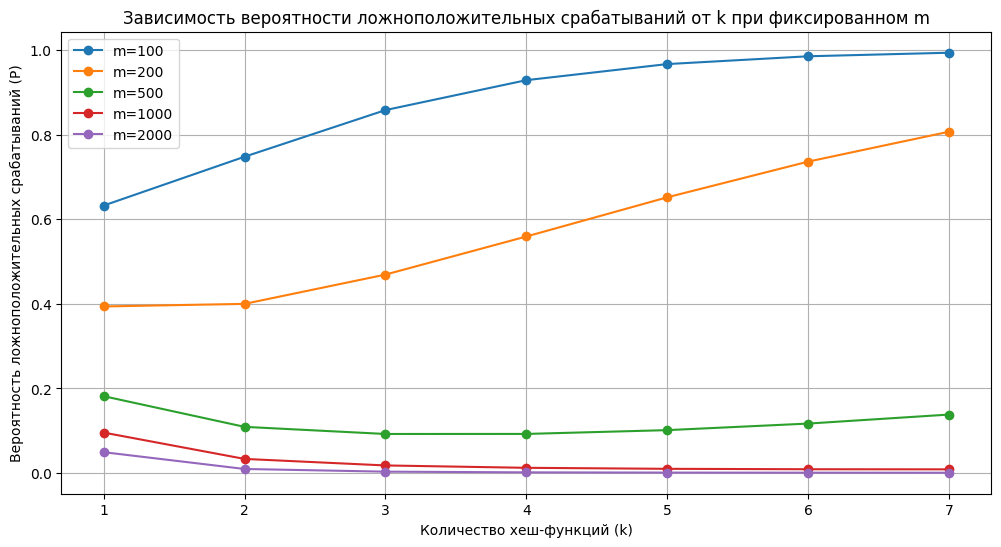

In [ ]:
import math
import matplotlib.pyplot as plt
import pandas as pd

# Функция для вычисления вероятности ложноположительных срабатываний
def false_positive_probability(m, k):
    n = 100  # Количество элементов
    if m == 0 or n == 0:
        return 0
    exponent = -(k * n) / m
    probability = (1 - math.exp(exponent)) ** k
    return probability

# Диапазоны для m и k
m_values = [100, 200, 500, 1000, 2000]  # Размеры битового массива
k_values = [1, 2, 3, 4, 5, 6, 7]       # Количество хеш-функций

# Графики зависимости P от m при фиксированном k
plt.figure(figsize=(12, 6))
for k in k_values:
    probabilities = [false_positive_probability(m, k) for m in m_values]
    plt.plot(m_values, probabilities, label=f"k={k}", marker='o')

# Создание таблицы для P от m при фиксированном k
table_data_m = {f"k={k}": [false_positive_probability(m, k) for m in m_values] for k in k_values}
df_m = pd.DataFrame(table_data_m, index=[f"m={m}" for m in m_values])
print("Таблица зависимости P от m при фиксированном k:")
print(df_m)

plt.title("Зависимость вероятности ложноположительных срабатываний от m при фиксированном k")
plt.xlabel("Размер битового массива (m)")
plt.ylabel("Вероятность ложноположительных срабатываний (P)")
plt.legend()
plt.grid()
plt.show()

# Графики зависимости P от k при фиксированном m
plt.figure(figsize=(12, 6))
for m in m_values:
    probabilities = [false_positive_probability(m, k) for k in k_values]
    plt.plot(k_values, probabilities, label=f"m={m}", marker='o')

# Создание таблицы для P от k при фиксированном m
table_data_k = {f"m={m}": [false_positive_probability(m, k) for k in k_values] for m in m_values}
df_k = pd.DataFrame(table_data_k, index=[f"k={k}" for k in k_values])
print("\nТаблица зависимости P от k при фиксированном m:")
print(df_k)

plt.title("Зависимость вероятности ложноположительных срабатываний от k при фиксированном m")
plt.xlabel("Количество хеш-функций (k)")
plt.ylabel("Вероятность ложноположительных срабатываний (P)")
plt.legend()
plt.grid()
plt.show()